In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
path = "/Users/younghyunkim/Desktop/dataproject/my_closet/raw_data"

In [3]:
df = pd.read_csv(f"{path}/closet_data_v3.csv")
df.head()

,제품명,계절,구매 년도,카테고리,구매처,브랜드 여부,구매 전 착용 여부,색상,가격,유행 여부,구매 목적,최근 1년 내 착용 여부,착용 빈도,만족도,주변 평가,성공점수,색상그룹,가격_bin,가격_q_bin,성공여부
0,배색 가디건 네이비,봄가을,2021,상의,1,0,1,네이비,3,0,일상,1,5,5,3,4.333333,블루 계열,1-4,매우 낮은 가격,1
1,배색 가디건 하늘,봄가을,2021,상의,0,0,1,스카이블루,3,0,일상,1,3,4,4,3.666667,블루 계열,1-4,매우 낮은 가격,1
2,줄무늬 티셔츠,봄가을,2014,상의,0,0,0,네이비,1,0,일상,1,4,5,4,4.333333,블루 계열,1-4,매우 낮은 가격,1
3,파란색 크롭 셔츠,봄가을,2023,상의,1,1,0,스카이블루,4,1,일상,1,4,4,4,4.000000,블루 계열,1-4,낮은 가격,1
4,숏 트렌치 코트,봄가을,2023,겉옷,0,1,1,베이지,16,1,일상,1,3,4,3,3.333333,브라운 계열,12-16,높은 가격,1


In [4]:
df.shape

(150, 20)

In [6]:
df['성공점수'].mean()

3.2177777777599985

In [7]:
df['성공점수'].median()

3.333333333

In [8]:
df['색상그룹'].mode()

0    블루 계열
Name: 색상그룹, dtype: object

<AxesSubplot:>

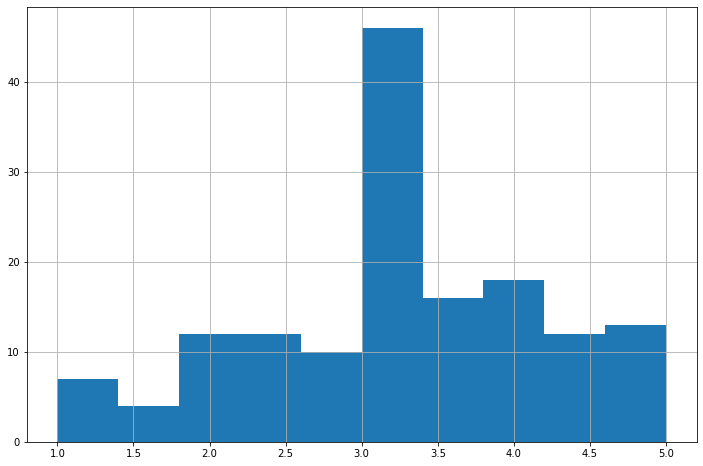

In [9]:
df['성공점수'].hist(bins=10, figsize=(12,8))

In [13]:
# pip install pingouin
import pingouin as pg

In [14]:
# 신뢰 구간 구하기

pg.ttest(df["성공점수"], 0, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,41.591792,149,two-sided,6.749313e-84,"[3.06, 3.37]",3.395956,1.379e+80,1.0


In [16]:
import scipy #numpy랑 같이 불러오기
scipy.stats.bootstrap([df['성공점수']], np.mean)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0599999999799996, high=3.359999999993333), standard_error=0.07717684493426742)

In [17]:
scipy.stats.bootstrap([df['성공점수']], np.median, confidence_level=0.99)

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.0, high=3.333333333), standard_error=0.13304524473840948)

In [18]:
#귀무가설: 설마 900만원은 아니곘지? p 발류를 a와 비교 
#유의수준(5% = 0.05)
#0.021852 < 0.05 귀무 가설 기각 (통계적으로 유의함-> 기각 -  귀무가설이 틀렸다 ) (상식 파괴)
pg.ttest(df['성공점수'], 3.5, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.647899,149,two-sided,0.000365,"[3.06, 3.37]",0.29785,47.594,0.951976


<AxesSubplot:xlabel='가격', ylabel='성공점수'>

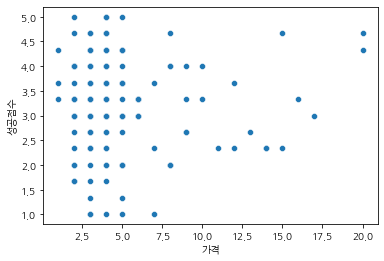

In [24]:
sns.scatterplot(x='가격', y='성공점수', data=df)

In [25]:
pg.corr(df['가격'], df['성공점수']) #표본상관계수 r값

,n,r,CI95%,p-val,BF10,power
pearson,150,-0.002021,"[-0.16, 0.16]",0.980416,0.102,0.049963


In [26]:
from statsmodels.formula.api import ols

In [35]:
# p < a - 통계적으로 유의한 차이가 있다("두 집단의 평균이 다르다") (a=0.05)

In [40]:
#카테고리별로 확인해보기
df_b = df[df['카테고리'] == '하의']

In [38]:
# 바지는 입어보고 구매해야 성공 확률이 높다.
try_yes = df_b['성공점수'][df_b["구매 전 착용 여부"] == 1]
try_no = df_b['성공점수'][df_b["구매 전 착용 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.986901,24.380236,two-sided,0.333385,"[-0.44, 1.24]",0.374504,0.511,0.15685


In [31]:
try_yes = df['성공점수'][df["유행 여부"] == 1]
try_no = df['성공점수'][df["유행 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.130928,35.859071,two-sided,0.265593,"[-0.71, 0.2]",0.267705,0.385,0.245491


In [41]:
try_yes = df['성공점수'][df["브랜드 여부"] == 1]
try_no = df['성공점수'][df["브랜드 여부"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.156603,12,two-sided,0.269941,"[-0.55, 1.79]",0.61823,0.685,0.186843


In [36]:
try_yes = df['성공점수'][df["구매처"] == 1]
try_no = df['성공점수'][df["구매처"] == 0]
pg.ttest(try_yes, try_no, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.380194,52.782408,two-sided,0.705327,"[-0.46, 0.31]",0.076696,0.218,0.068032
